In [382]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [383]:
train=pd.read_csv('F:\\train.csv')
test=pd.read_csv('F:\\test.csv')
df.head()

,Review Text,Review Title,topic
0,"Did nothing for me, didn't help lost even with...",Useless,15
1,"Did nothing for me, didn't help lost even with...",Useless,11
2,I have bought these bags and immediately open...,TRASH!!! Do not buy these bags it’s a waist of...,4
3,Gave me an allergic reaction on my face :(,Do not recommend,0
4,These don't compare to the name brand wipes. F...,Can't tackle big messes,17


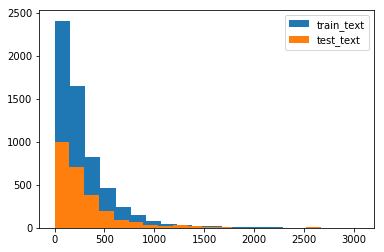

In [384]:
length_train = train['Review Text'].str.len() 
length_test = test['Review Text'].str.len() 
plt.hist(length_train, bins=20, label="train_text") 
plt.hist(length_test, bins=20, label="test_text") 
plt.legend() 
plt.show()

In [385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5959 entries, 0 to 5958
Data columns (total 3 columns):
Review Text     5959 non-null object
Review Title    5959 non-null object
topic           5959 non-null int64
dtypes: int64(1), object(2)
memory usage: 139.7+ KB


In [386]:
train['Review Text'] = train['Review Text'].str.replace("[^a-zA-Z#]", " ")
test['Review Text'] = test['Review Text'].str.replace("[^a-zA-Z#]", " ")

In [387]:
train['Review Text'] = train['Review Text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
test['Review Text'] = test['Review Text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [388]:
train['Review Title'] = train['Review Title'].str.replace("[^a-zA-Z#]", " ")
test['Review Title'] = test['Review Title'].str.replace("[^a-zA-Z#]", " ")

In [389]:
train['Review Title'] = train['Review Title'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
test['Review Title'] = test['Review Title'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [390]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(train['topic'])
train['topic']=le.transform(train['topic'])

In [391]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(stop_words='english',max_df=0.9,max_features=1000)
tf.fit(train['Review Text'])
train_tf=pd.DataFrame(tf.transform(train['Review Text']).toarray(),columns=tf.get_feature_names()).add_prefix('tfidf_')
train=train.join(train_tf)

In [392]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(stop_words='english',max_df=0.9,max_features=1000)
tf.fit(test['Review Text'])
test_tf=pd.DataFrame(tf.transform(test['Review Text']).toarray(),columns=tf.get_feature_names()).add_prefix('tfidf_')
test=test.join(test_tf)

In [393]:
train=train.drop('Review Text',1)
review=test['Review Text']
test=test.drop('Review Text',1)

In [394]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf1=TfidfVectorizer(stop_words='english',max_df=0.9,max_features=500)
tf1.fit(train['Review Title'])
train_tf1=pd.DataFrame(tf1.transform(train['Review Title']).toarray(),columns=tf1.get_feature_names()).add_prefix('tfidf1_')
train=train.join(train_tf1)

In [395]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf1=TfidfVectorizer(stop_words='english',max_df=0.9,max_features=500)
tf1.fit(test['Review Title'])
test_tf1=pd.DataFrame(tf1.transform(test['Review Title']).toarray(),columns=tf1.get_feature_names()).add_prefix('tfidf1_')
test=test.join(test_tf1)

In [396]:
train=train.drop('Review Title',1)
test=test.drop('Review Title',1)

In [397]:
train.shape

(5959, 2501)

In [398]:
test.shape

(2553, 2500)

In [399]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [400]:
x=train.drop('topic',1)
y=train['topic']

In [401]:
x_train , x_test , y_train , y_test = train_test_split(x,y,stratify=y,random_state=42)

In [402]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

0.34697986577181206

In [403]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,n_jobs=-1)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.4147651006711409